In [1]:
# Plot the sunspot number using the SILSO/ROB data
# 
# 21-Sep-2023 IGH

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 20,'font.family':"sans-serif",\
            'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [3]:
# Data from https://www.sidc.be/SILSO/datafiles
# Probably a neater way of doing this but using one pandas df to load in
# the other pandas df for the proper time format and data
ssn_in = pd.read_csv('SN_m_tot_V2.0.csv',sep=';',header=None)

tt=Time(ssn_in[2],format='decimalyear')
ssn=pd.DataFrame(ssn_in[3].values,index=tt.datetime, columns=['num'])

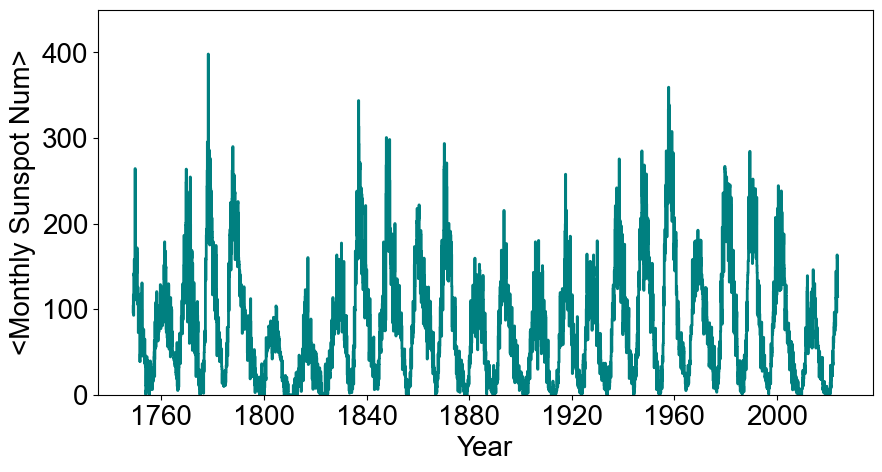

In [4]:
fig,ax = plt.subplots(figsize=(10,5))
ax.step(ssn.index, ssn["num"].values,lw=2,color='teal')
ax.set_xlabel('Year')
ax.set_ylabel('<Monthly Sunspot Num>')
ax.set_ylim([0,450])
plt.show()


In [5]:
# Restrict time range of dataframe then plot again
start_tim=Time('2000',format='decimalyear')
end_tim=Time('2024',format='decimalyear')
ssnt=ssn.truncate(start_tim.iso,end_tim.iso)

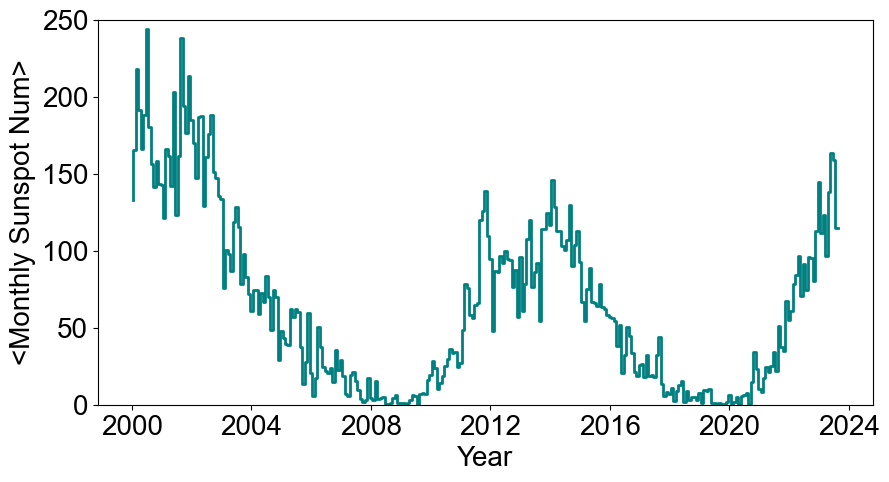

In [6]:
fig,ax = plt.subplots(figsize=(10,5))
ax.step(ssnt.index, ssnt["num"].values,lw=2,color='teal')
ax.set_xlabel('Year')
ax.set_ylabel('<Monthly Sunspot Num>')
ax.set_ylim([0,250])
plt.show()

In [7]:
# Overplot the NuSTAR observing times
ns_in = pd.read_csv('all_nstims.csv',sep=',',header='infer')

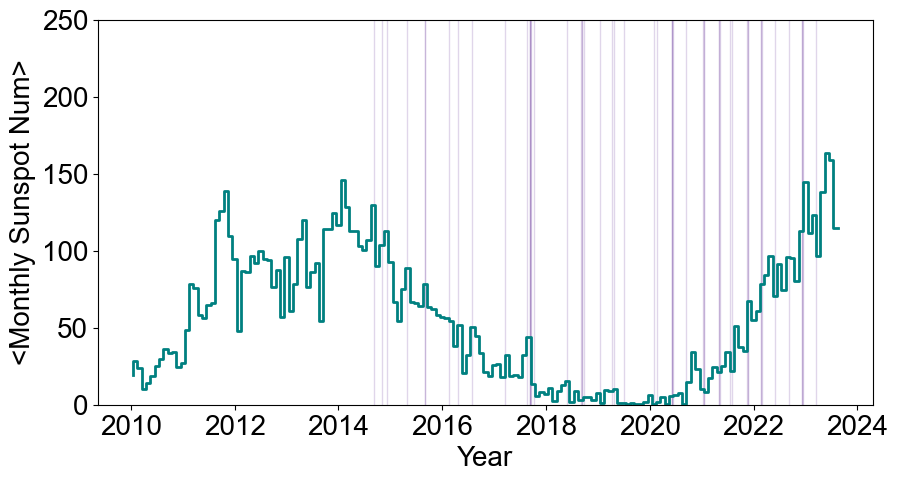

In [8]:
# Truncate more and then plot the sunspot numbers with the NuSTAR times
start_tim=Time('2010',format='decimalyear')
end_tim=Time('2024',format='decimalyear')
ssnt2=ssn.truncate(start_tim.iso,end_tim.iso)

fig,ax = plt.subplots(figsize=(10,5))
ax.step(ssnt2.index, ssnt2["num"].values,lw=2,color='teal')
ax.set_xlabel('Year')
ax.set_ylabel('<Monthly Sunspot Num>')
ax.set_ylim([0,250])

for i in range(len(ns_in['Num'])):
    st_tim=Time(ns_in['Start_Time'][i],format='iso')
    ed_tim=Time(ns_in['End_Time'][i],format='iso')
    ax.axvspan(st_tim.datetime,ed_tim.datetime,color='rebeccapurple',alpha=0.2, label='Onset')

plt.show()